In [1]:
# We know the usage and the popularity of red wine in the recent era. We also should be concerned about the quality of the wine
# as this will help in the best selection of red wine. Here we will delve deeper into the constituents which affects the quality
# of red wine. We will also ponder about the relationships and will predict the quality based on array of constituents.

In [2]:
# Firstly, we import pandas and basic libraries for the viewing the data

In [3]:
import pandas as pd
og_redwine_df = pd.read_csv("redwine.csv")
og_redwine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
# now we will look into whether there are any null entries or duplicated are there or not? also seeing the shape of dataframe
og_redwine_df.shape


(1599, 12)

In [5]:
og_redwine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
og_redwine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
og_redwine_df.duplicated().sum()

240

In [8]:
# hence there are 240 duplicated entries so we remove those duplicated data.

In [9]:
og_redwine_df.drop_duplicates(inplace=True)
og_redwine_df.shape

(1359, 12)

In [10]:
# Since we will modify the dataset so we preserve the original dataset as it is and create a copy of it. 
redwine_df_cp = og_redwine_df.copy()
redwine_df_cp.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [11]:
# Now, we visualize the dataset with the probabiltiy density

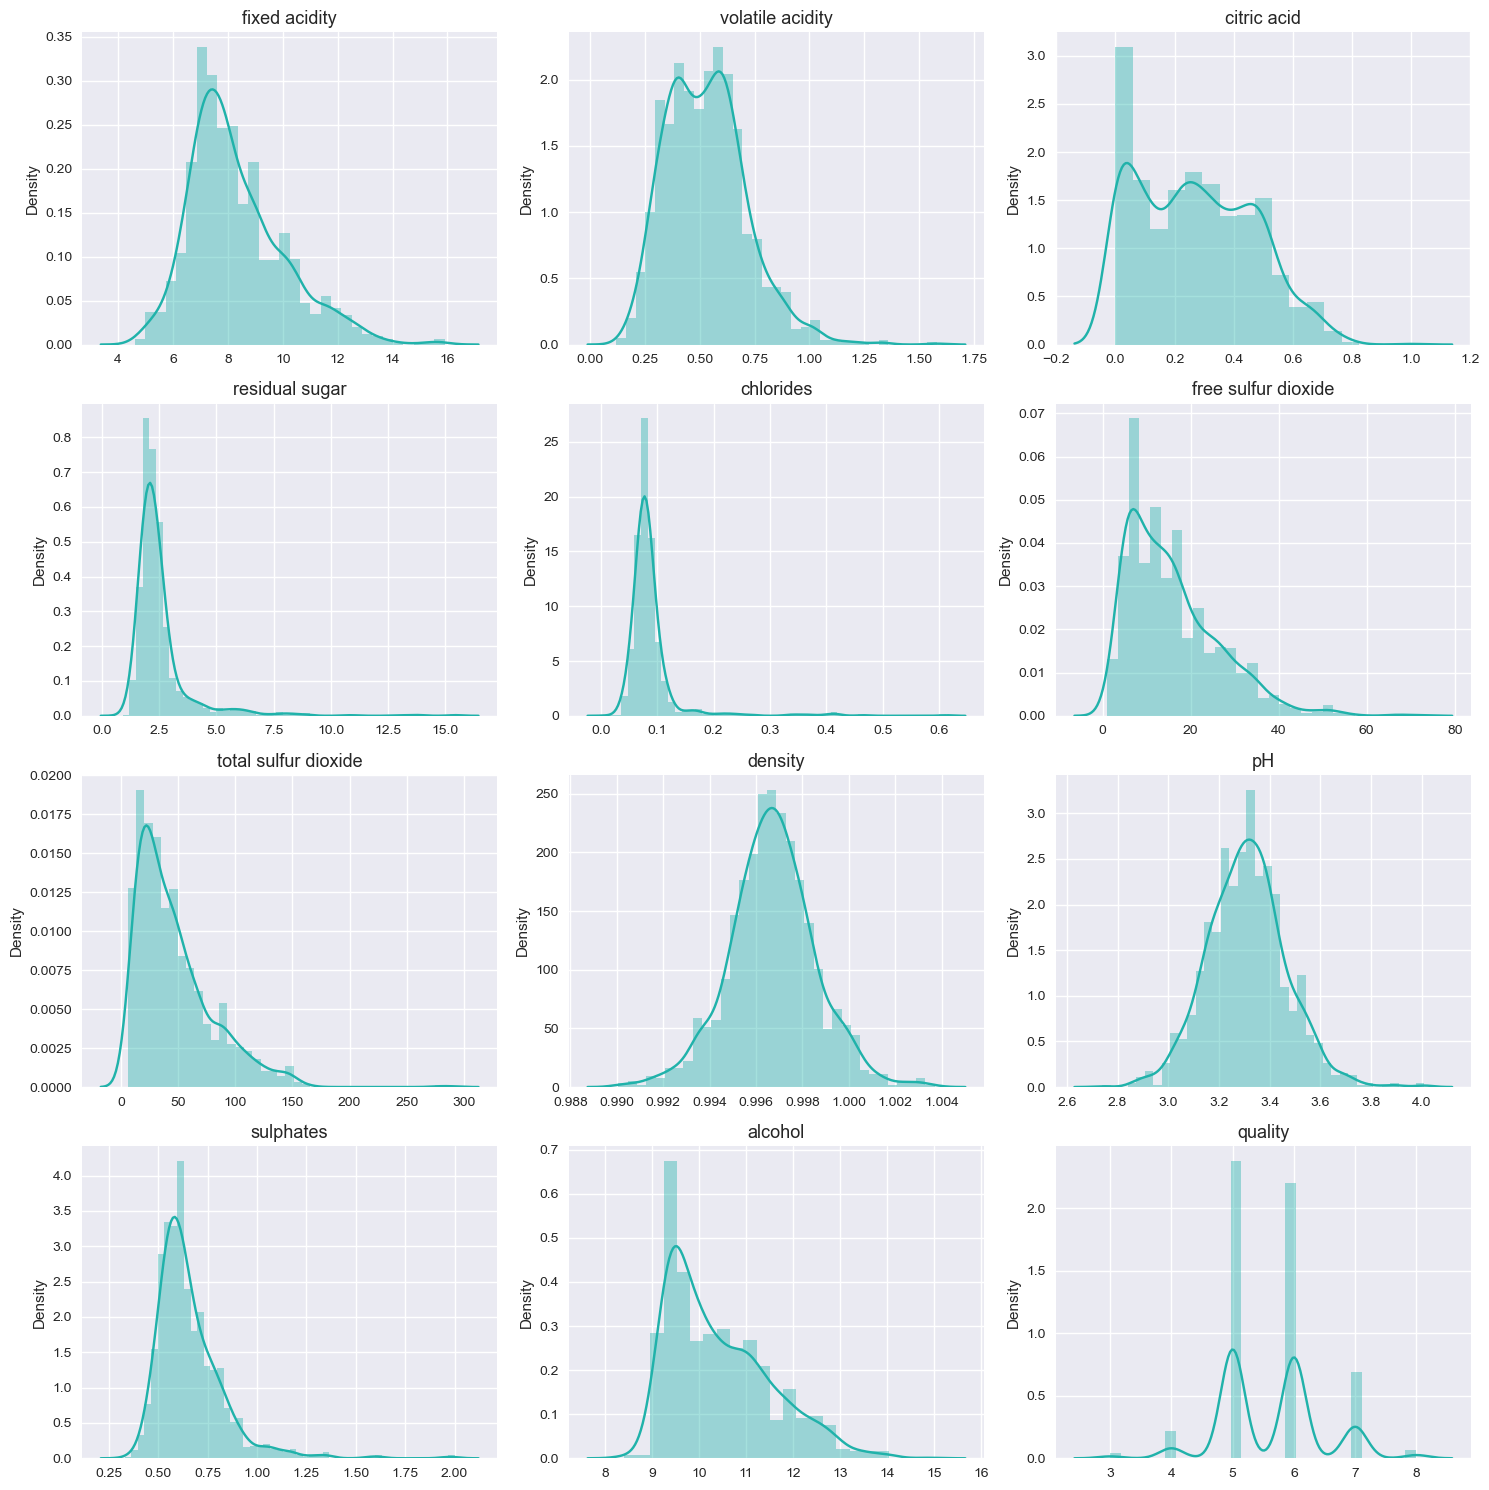

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn')
fig = plt.figure(figsize=(15,15))

for index,column in enumerate(redwine_df_cp.columns):
    plt.subplot(4,3,index+1)
    sns.distplot(x = redwine_df_cp.loc[:, column], color = 'lightseagreen')
    plt.title(column, size = 13)
    fig.tight_layout()
    plt.grid(True)
plt.show()

In [13]:
# As we can see in some density chart there are right tailed distribution, they might be due to the outliers as well.
# Lets for our simplification keep the outliers as it can infer the real data as well. The density distribution of quality is discrete as 
# it is discrete in nature.

<Axes: >

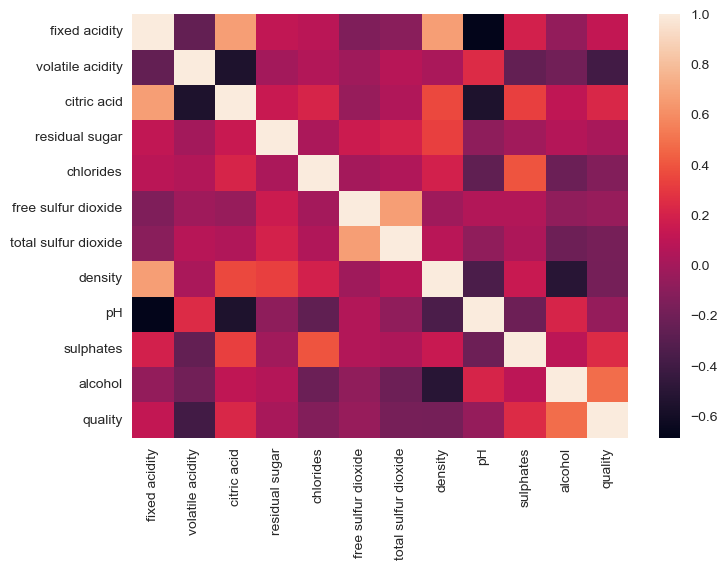

In [14]:
# Lets observe the relationship between several variables and see the realtion between the quality with other factors.
sns.heatmap(redwine_df_cp.corr())


In [15]:
# From the heatmap above we can see that the positive correlation is with alcohol and negative with volatile acidity of quality. These are 
# extreme correlation values that we can infer from them. This doesn't mean they are related but we will ponder whether they are related or not.

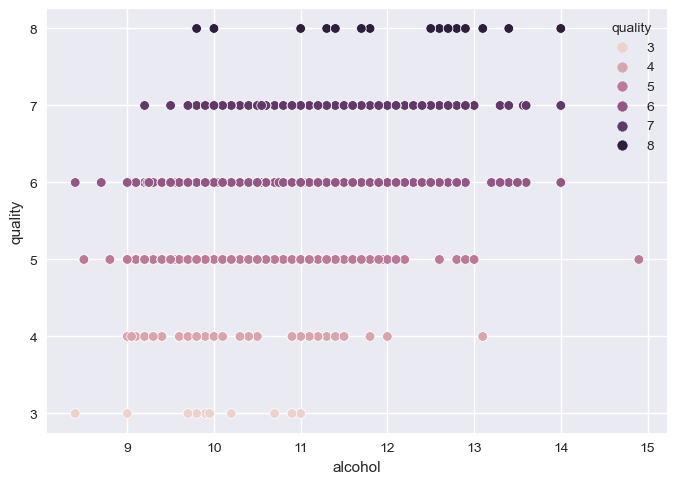

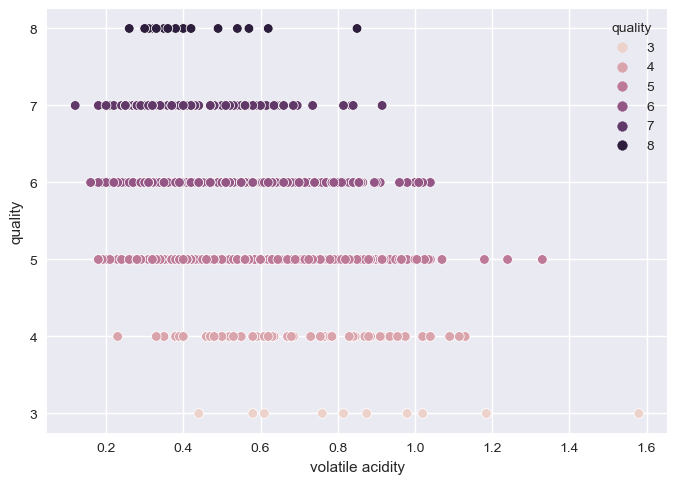

In [16]:
#Lets quickly see the scatterplot 
sns.scatterplot(data=redwine_df_cp, y="quality", x="alcohol", hue="quality")
plt.show()
sns.scatterplot(data=redwine_df_cp, y="quality", x="volatile acidity", hue="quality")
plt.show()

In [17]:
# As we can see we still can't infer much from them as whether they are related or not. We can at least see as volatile acidity goes down quality goes up.
# Lets try to group them into categories of quality as low, medium and high as 0, 1 , 2.
# Lets create another copy of dataframe so as to avoid the structure.
redwine_test_df = redwine_df_cp.copy()
redwine_test_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [18]:
# lets define a function to help with us.
def quality_value(value):
    value = str(value) 
    if value == '3':
        value = value.replace('3','low')
        return value
    elif value == '4':
        value = value.replace('4','low')
        return value
    elif value == '5':
        value = value.replace('5','medium')
        return value
    elif value == '6':
        value = value.replace('6','medium')
        return value
    elif value == '7':
        value = value.replace('7','high')
        return value
    elif value == '8':
        value = value.replace('8','high')
        return value
    
redwine_test_df['quality'] = redwine_test_df['quality'].apply(quality_value)

In [19]:
redwine_test_df["quality"].unique()

array(['medium', 'high', 'low'], dtype=object)

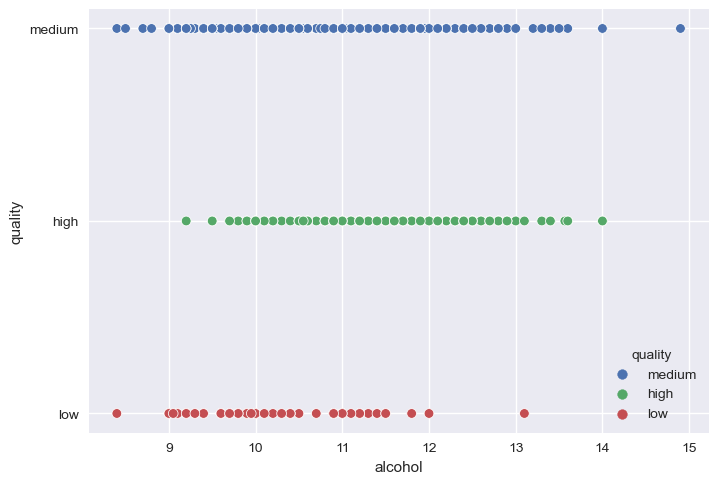

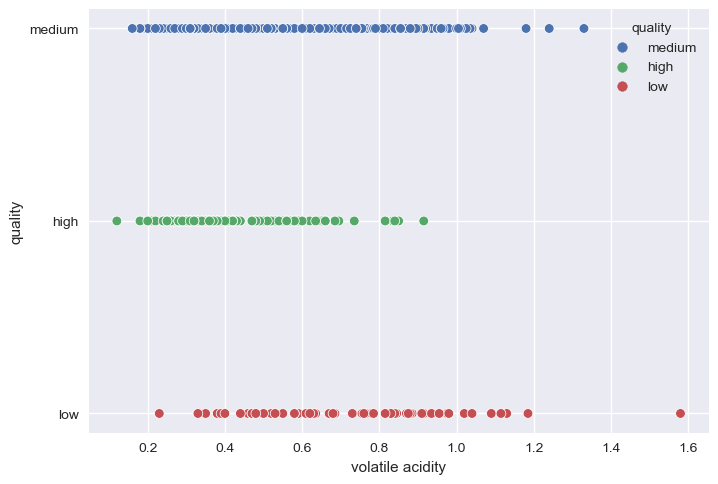

In [20]:
# Now lets observe the relation again with scatterplot
sns.scatterplot(data=redwine_test_df, y="quality", x="alcohol", hue="quality")
plt.show()

sns.scatterplot(data=redwine_test_df, y="quality", x="volatile acidity", hue="quality")
plt.show()

In [21]:
# Hence we could infer that as volatile acidity decreases the quality of red wine also increases which is true in reality.
# But lets explore further in finding out about other physiochemical properties affect redwine quality.

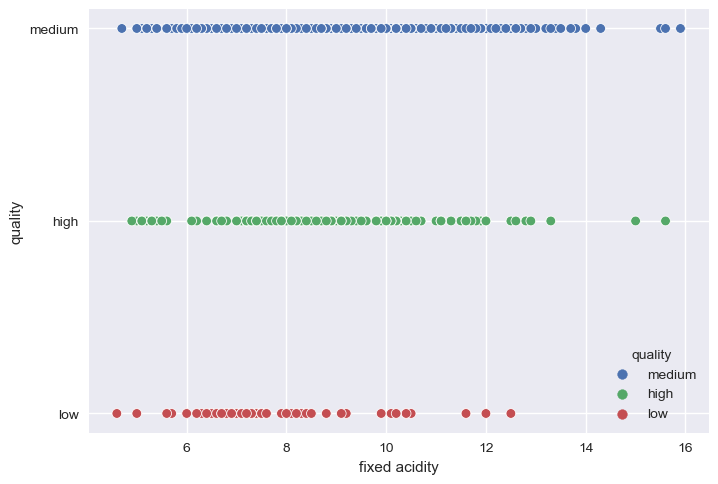

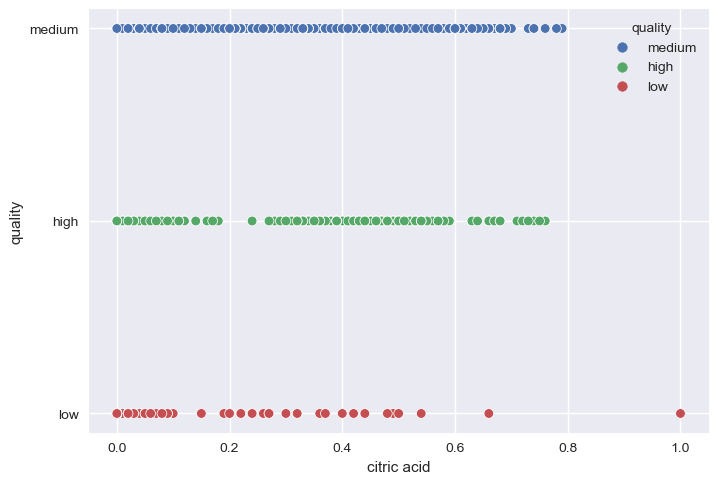

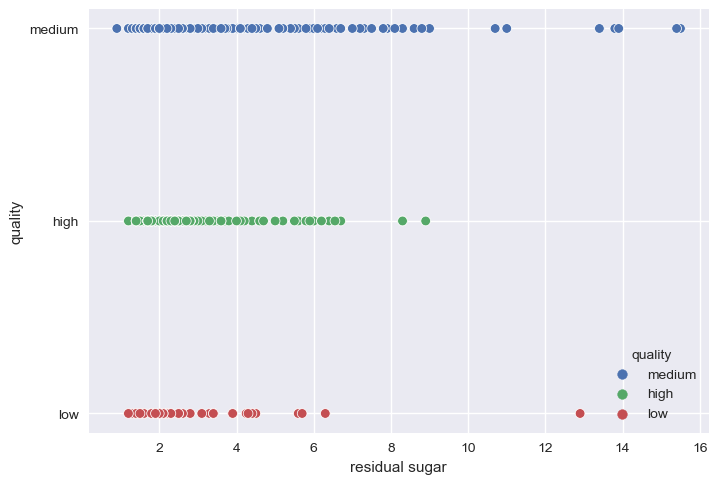

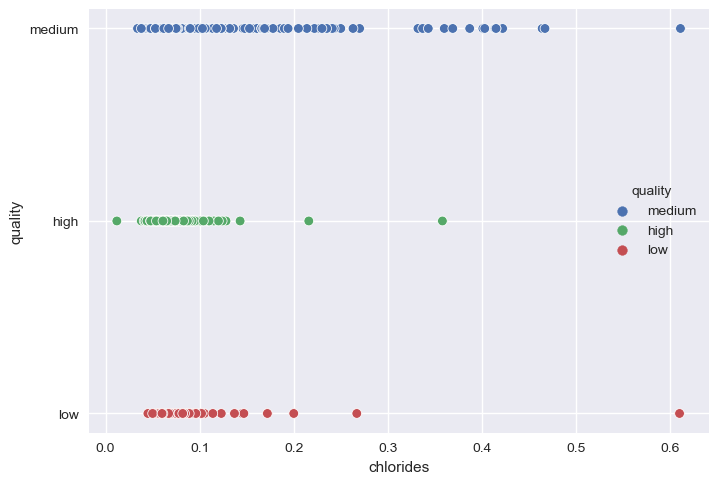

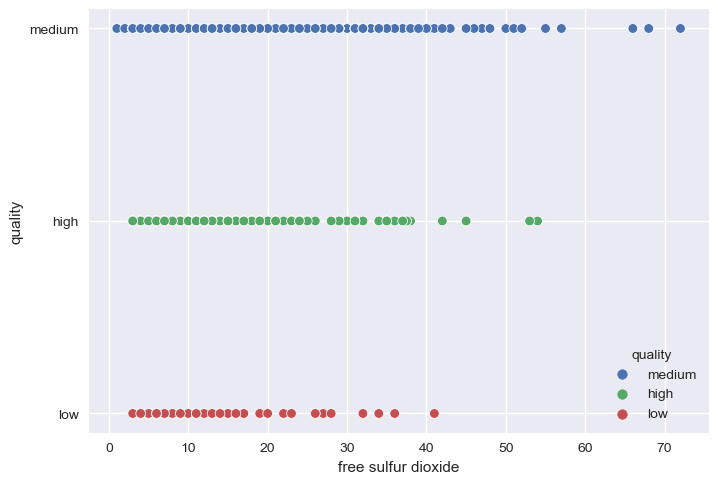

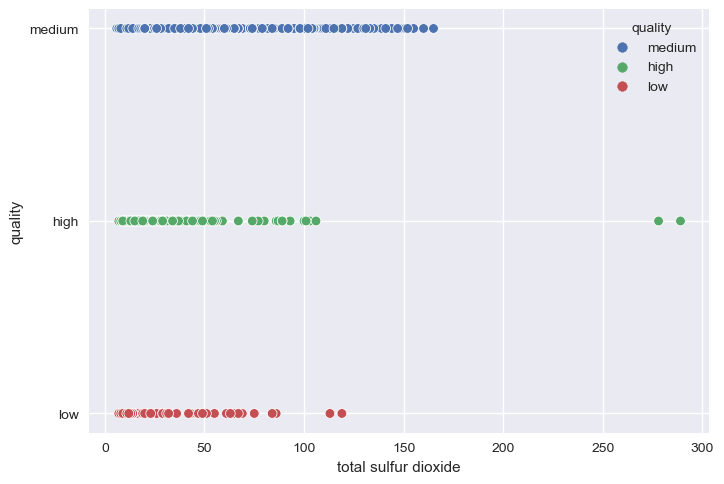

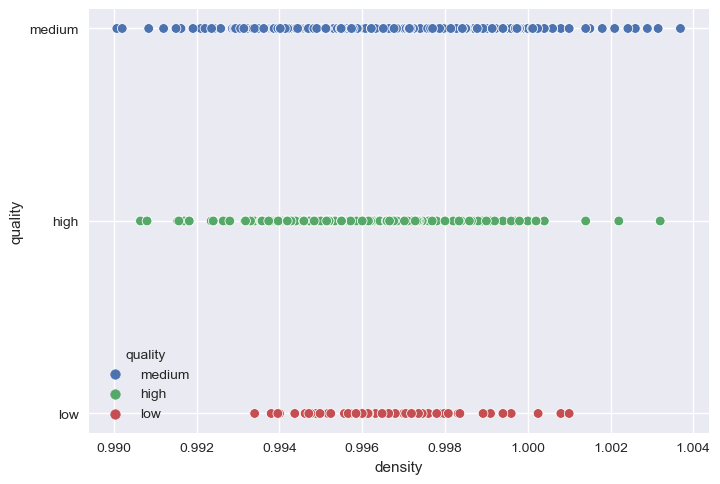

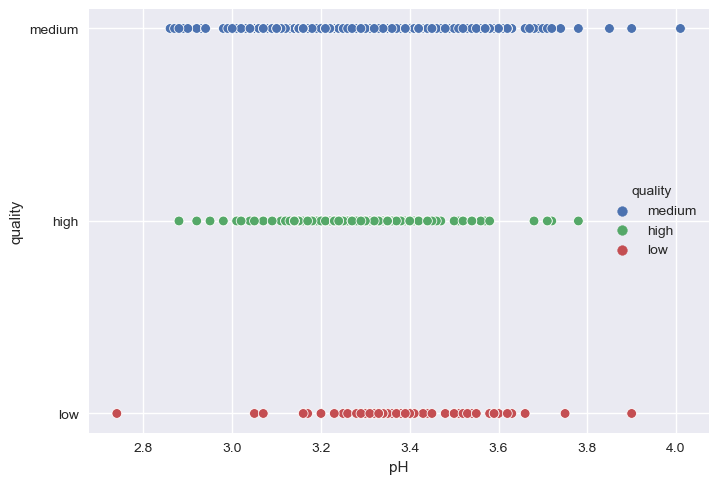

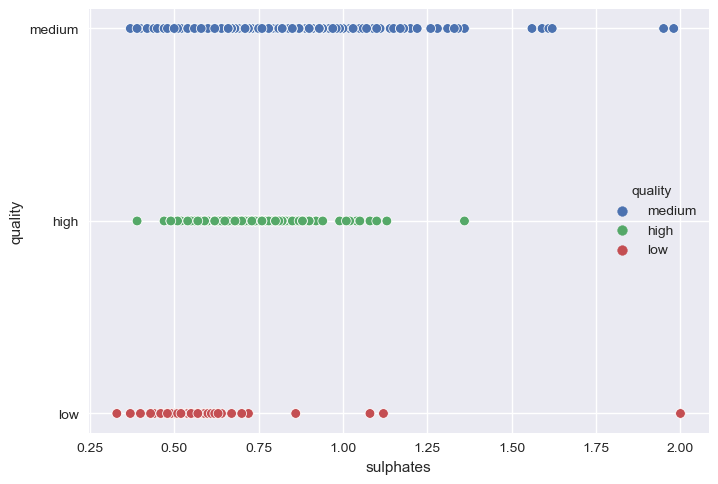

In [22]:
# Lets see the scatterplot of other variables with quality
for index, column in enumerate(redwine_test_df.columns):
    if column == "quality" or column == "alcohol" or column == "volatile acidity":
        continue
    else:
        sns.scatterplot(data=redwine_test_df, x = column, y="quality", hue="quality")
        plt.grid(True)
        plt.show()

In [23]:
# Hence we can infer that not just alcohol and volatile acidity but as a whole all other factors contribute in the quality of redwine.

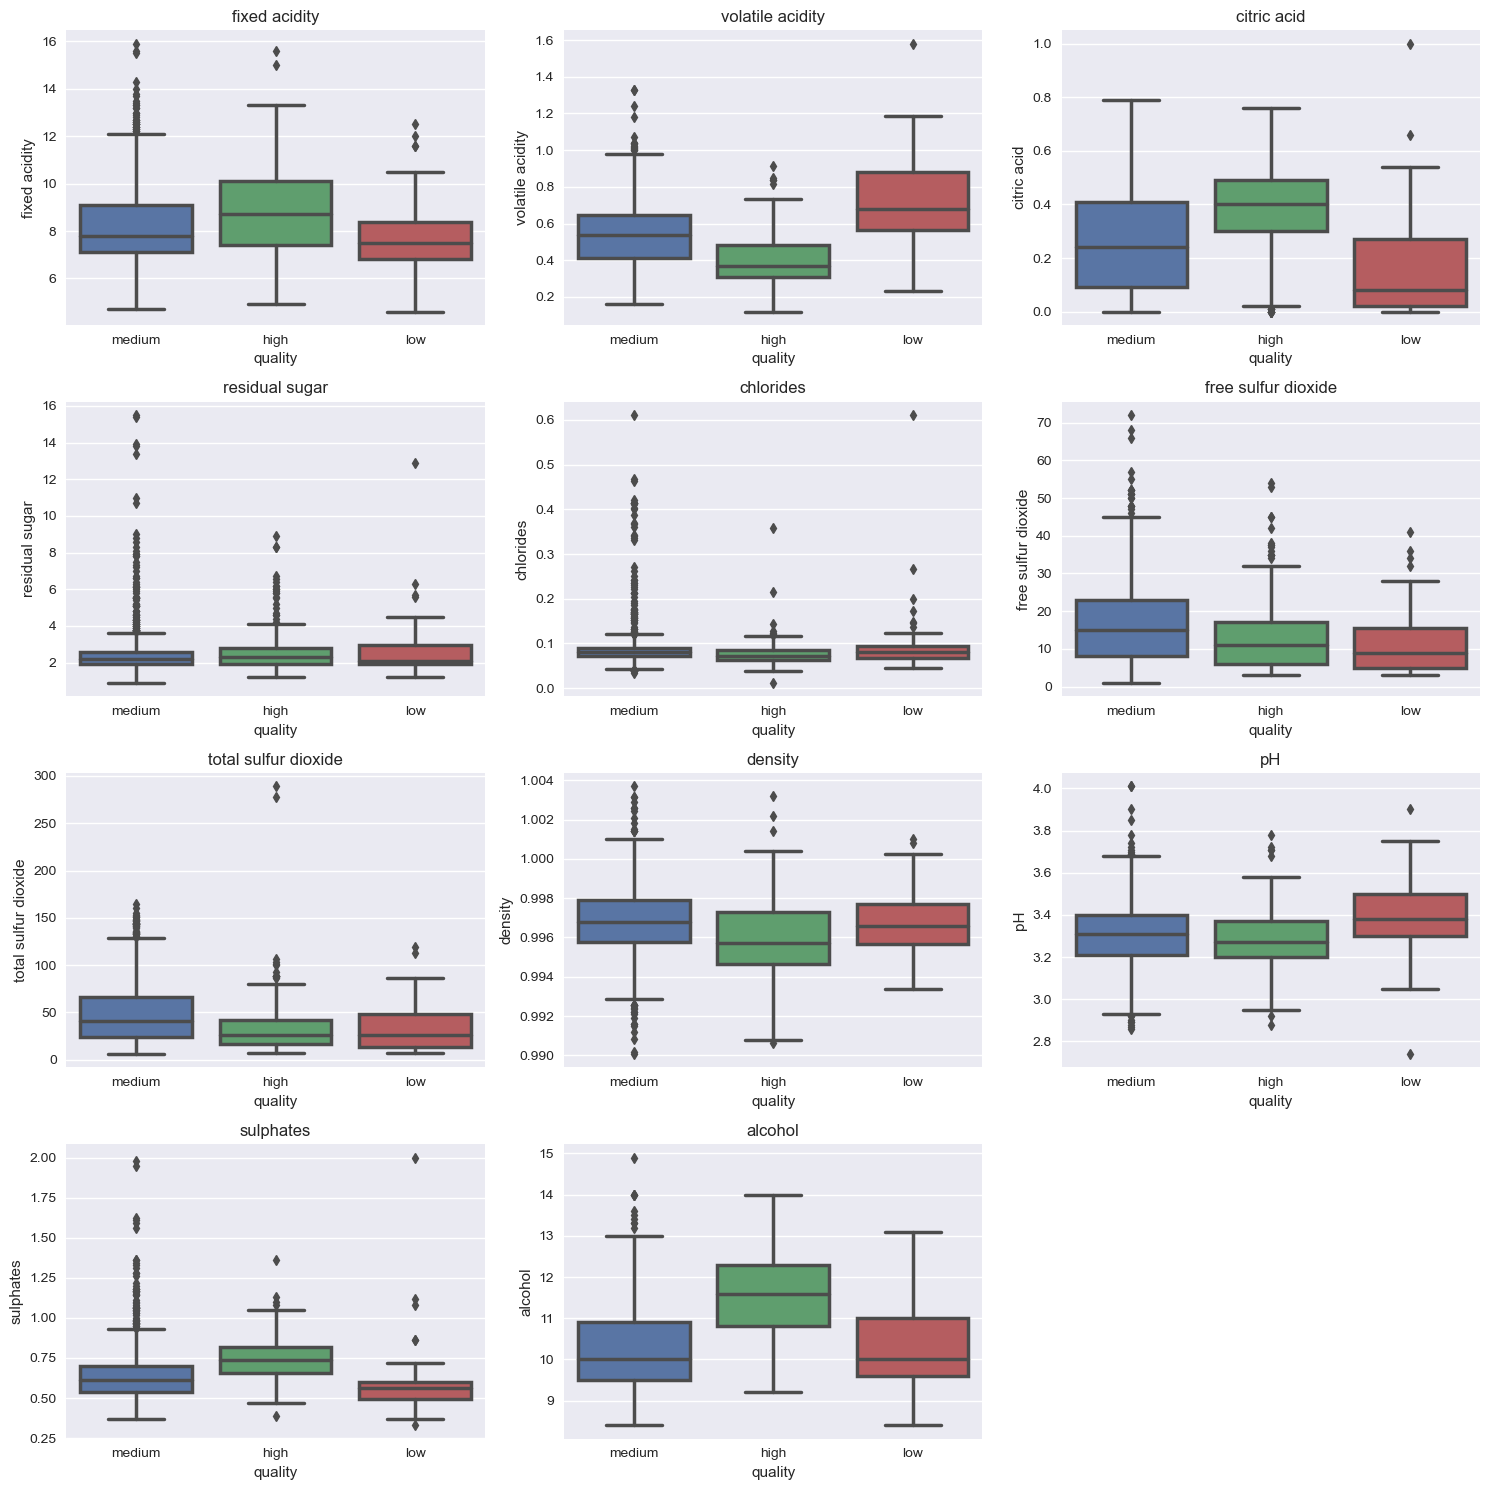

In [24]:
# Lets highlight the outliers using the seaborn boxplot
fig = plt.figure(figsize=(15,15))
for index,column in enumerate(list(redwine_test_df.columns[:-1])):
    plt.subplot(4,3,index+1)
    sns.boxplot(y =redwine_test_df.loc[:, column], x =redwine_test_df['quality'], linewidth=2.5)
    plt.title(column, size = 12)
fig.tight_layout()


In [25]:
# Now we will delve deeper into the classification part
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


import catboost as cb
import xgboost as xgb
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier




In [26]:
# here some variables will take the values as 0,1,2 so we modify the quality column accordingly

redwine_test_df['quality'] = redwine_test_df['quality'].map({'high': 2, 'medium': 1, 'low': 0})
redwine_test_df['quality'].unique()

array([1, 2, 0], dtype=int64)

In [27]:
# lets separate the datasets into dependent and independent variables. 
# Here quality is our dependent while all other physiochemical parameters are independent variables.

y = redwine_test_df["quality"]
x = redwine_test_df.drop(["quality"], axis=1)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=48)

# The size of X_train, X_test, y_train, y_test is as follows
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")



X_train: (1087, 11)
X_test: (272, 11)
y_train: (1087,)
y_test: (272,)


In [29]:
# Now the main thing here is the standarization. The reason behind standarizing the dataset is making the data comparable by eliminating
# the difference in the measurement units in the data. For this we use standard scaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

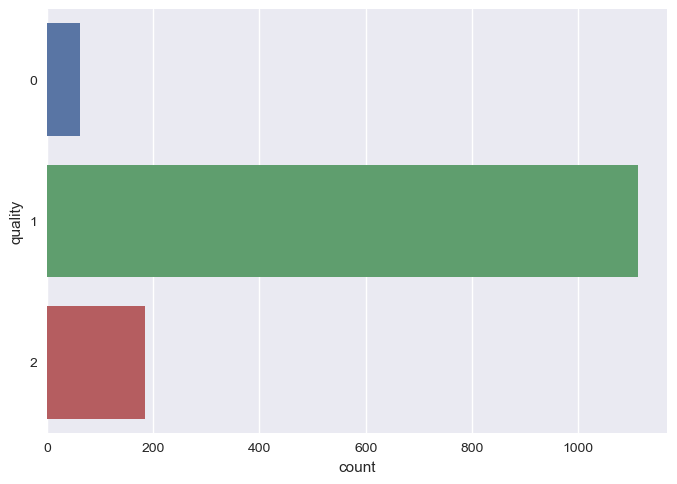

In [30]:
# Now we use SMOTE technique for removing the class imbalance.
sns.countplot(data=redwine_test_df, y="quality")
plt.show()

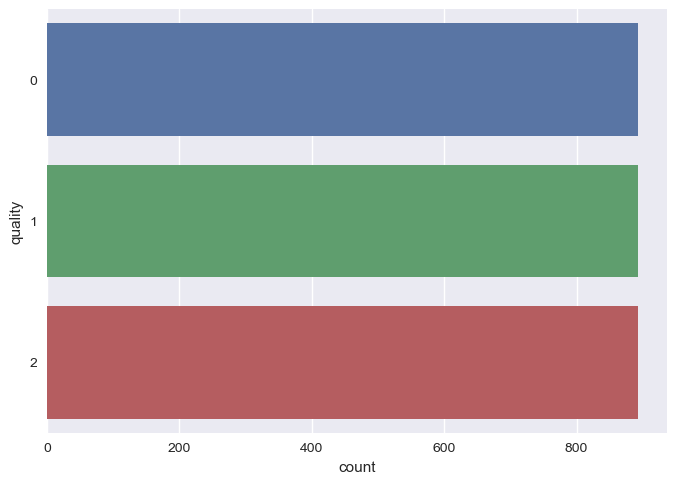

In [31]:
smote = SMOTE(random_state=48)
X_train, y_train = smote.fit_resample(X_train, y_train)

sns.countplot(y=y_train)
plt.show()

In [32]:
# Now we use models to create a modelling for the ML.

In [33]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Support Vector Classifier', SVC()),
    ('Naive Bayes', GaussianNB()),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('XGBoost', xgb.XGBClassifier()),
    ('LightGBM', lgb.LGBMClassifier()),
    ('CatBoost', cb.CatBoostClassifier(verbose=0)),
    ('AdaBoost', AdaBoostClassifier())
]

conf_matrices = []
class_reports = []
outcomes = []

for model_name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=5)
    mean_accuracy = cv_results.mean()
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    conf_matrices.append((model_name, cm))
    class_reports.append((model_name, cr))
    outcomes.append((model_name, mean_accuracy, accuracy))

df_results = pd.DataFrame(outcomes, columns=['Model', 'Cross-Validation Accuracy', 'Test Accuracy'])
df_results.sort_values('Cross-Validation Accuracy', ascending=False, inplace=True)

df_results


,Model,Cross-Validation Accuracy,Test Accuracy
8,CatBoost,0.936101,0.783088
7,LightGBM,0.931626,0.772059
6,XGBoost,0.930128,0.775735
5,Random Forest,0.923390,0.768382
3,KNN,0.856126,0.643382
1,Support Vector Classifier,0.842301,0.687500
4,Decision Tree,0.834835,0.669118
0,Logistic Regression,0.707031,0.636029
9,AdaBoost,0.706652,0.536765
2,Naive Bayes,0.654345,0.452206


In [34]:
# Clearly we can see the test accuracy isn't as high. Generally the model with the accuracy more that 70% is considered high so we
# will stick with that. Further after the classification report and confusion matrix we will tune the best model.

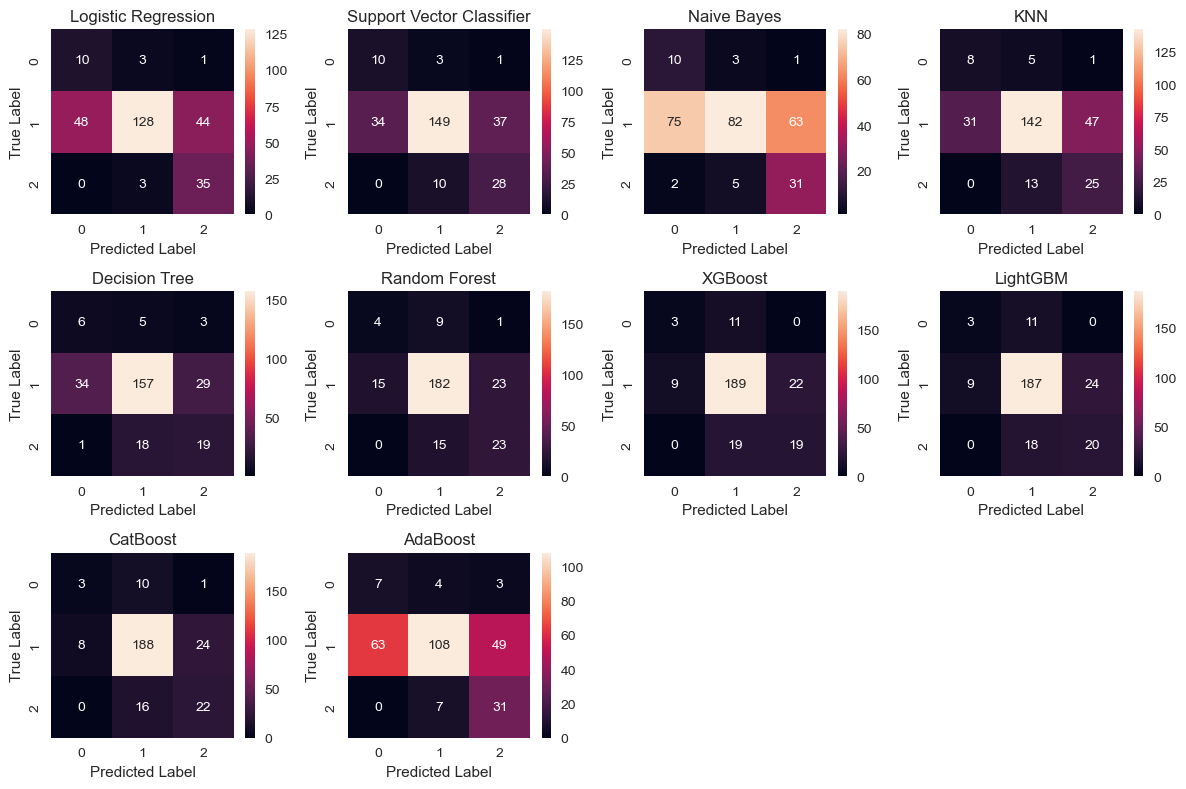

In [35]:
plt.figure(figsize=(12, 8))
for i, (model_name, cm) in enumerate(conf_matrices, 1):
    plt.subplot(3, 4, i)
    plt.title(model_name)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [36]:
for model_name, cr in class_reports:
    print(f'\033[1m{model_name}:\033[0m')
    print(f'\033[1mClassification Report:\033[0m')
    print(cr)
    print('-'*60)

Logistic Regression:
Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.71      0.28        14
           1       0.96      0.58      0.72       220
           2       0.44      0.92      0.59        38

    accuracy                           0.64       272
   macro avg       0.52      0.74      0.53       272
weighted avg       0.84      0.64      0.68       272

------------------------------------------------------------
Support Vector Classifier:
Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.71      0.34        14
           1       0.92      0.68      0.78       220
           2       0.42      0.74      0.54        38

    accuracy                           0.69       272
   macro avg       0.52      0.71      0.55       272
weighted avg       0.81      0.69      0.72       272

------------------------------------------------------------
Naive Bayes:
Classific

In [37]:
# Now we tune the hyperparameter of the model and we take the CatBoost as the model. For this we use optuna as
# it uses bayesian optimization to find the best hyperparameter

In [83]:
import optuna
from sklearn.metrics import mean_squared_error

def objective(trial):
    model = cb.CatBoostClassifier(
        iterations=trial.suggest_int("iterations", 100, 1000),
        learning_rate=trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        depth=trial.suggest_int("depth", 4, 10),
        l2_leaf_reg=trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        bootstrap_type=trial.suggest_categorical("bootstrap_type", ["Bayesian"]),
        random_strength=trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        bagging_temperature=trial.suggest_float("bagging_temperature", 0.0, 10.0),
        od_type=trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        od_wait=trial.suggest_int("od_wait", 10, 50),
        verbose=False
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [86]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

In [88]:
print('Best hyperparameters:', study.best_params)
print('Best Accuracy:', study.best_value)

Best hyperparameters: {'iterations': 722, 'learning_rate': 0.04482769720314783, 'depth': 8, 'l2_leaf_reg': 7.590754614205181e-06, 'bootstrap_type': 'Bayesian', 'random_strength': 0.09333094641242988, 'bagging_temperature': 5.108246352510624, 'od_type': 'Iter', 'od_wait': 17}
Best Accuracy: 0.7794117647058824


In [90]:
model = cb.CatBoostClassifier(**study.best_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
acc_score

0:	learn: 1.0556437	total: 30.3ms	remaining: 21.9s
1:	learn: 1.0185581	total: 57.7ms	remaining: 20.8s
2:	learn: 0.9826669	total: 81.8ms	remaining: 19.6s
3:	learn: 0.9477634	total: 113ms	remaining: 20.2s
4:	learn: 0.9175835	total: 133ms	remaining: 19s
5:	learn: 0.8881101	total: 151ms	remaining: 18s
6:	learn: 0.8605285	total: 168ms	remaining: 17.2s
7:	learn: 0.8342914	total: 185ms	remaining: 16.5s
8:	learn: 0.8107662	total: 202ms	remaining: 16s
9:	learn: 0.7910206	total: 220ms	remaining: 15.7s
10:	learn: 0.7708150	total: 237ms	remaining: 15.3s
11:	learn: 0.7505542	total: 255ms	remaining: 15.1s
12:	learn: 0.7311143	total: 274ms	remaining: 14.9s
13:	learn: 0.7142682	total: 290ms	remaining: 14.7s
14:	learn: 0.6990853	total: 308ms	remaining: 14.5s
15:	learn: 0.6824130	total: 324ms	remaining: 14.3s
16:	learn: 0.6670360	total: 342ms	remaining: 14.2s
17:	learn: 0.6517318	total: 358ms	remaining: 14s
18:	learn: 0.6392350	total: 375ms	remaining: 13.9s
19:	learn: 0.6245269	total: 393ms	remaining: 1

0.7794117647058824